# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import *

from mlxtend.plotting import plot_decision_regions

# K-Means (from scratch)

### Dataset

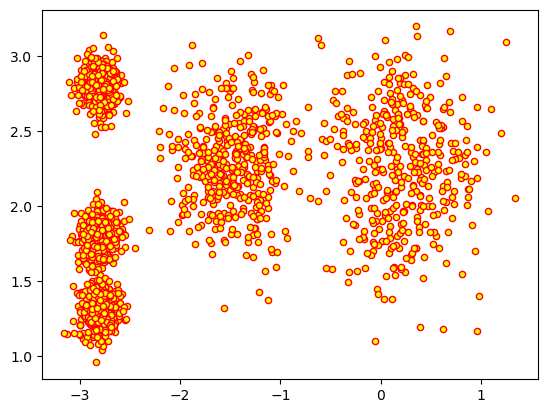

In [20]:
blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X1, y1 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X1[:, 0], X1[:, 1], s=20, c='yellow', edgecolor='red')

### Model

In [4]:
class KMeans:
    
    def __init__(self, n_clusters, max_iters=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state

    def fit(self, X):
        
        if self.random_state:
            np.random.seed(self.random_state)
            
        centers = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, None, :]-centers, axis=2)
            labels = np.argmin(distances, axis=1)
            new_centers = np.array([X[labels == c].mean(axis=0) for c in range(self.n_clusters)])
            
            if np.all(new_centers == centers):
                print(_)
                break
                
            centers = new_centers.copy()
            
        return labels, centers        

In [5]:
kmeans = KMeans(n_clusters=5, max_iters=50, random_state=25)

In [6]:
labels, centers = kmeans.fit(X1)

6


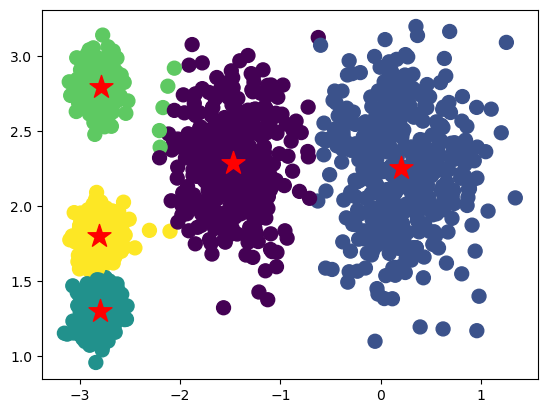

In [7]:
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=labels)
plt.scatter(centers[:, 0], centers[:, 1], s=300, marker='*', c='red')

# K-means(from sklearn)

## Example 1

### Dataset

In [8]:
X = pd.read_csv('data/Mall_Customers.csv')

X.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [9]:
X.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']
X = X.drop('customer_id', axis=1)
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})
display(X.head())

gender  age  annual_income  spending_score
0       0   19             15              39
1       0   21             15              81
2       1   20             16               6
3       1   23             16              77
4       1   31             17              40

In [11]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X[:, idx].copy()

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=3, max_iter=300, 
                tol=0.0001, random_state=111, algorithm='elkan')

TypeError: KMeans.__init__() got an unexpected keyword argument 'init'

In [ ]:
kmeans.fit(X)

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

Xm = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
Xm = Xm.reshape(xx.shape)

In [ ]:
plt.contourf(xx, yy, Xm, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids[: , 0], centroids[: , 1], s=300, c='red')

plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])

# Hierarchial Clustering

## Example 1

In [21]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')

In [22]:
agg.fit(X1)

AgglomerativeClustering(n_clusters=5)

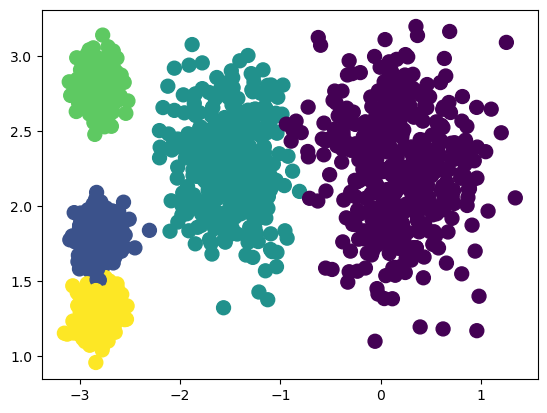

In [23]:
labels = agg.labels_

plt.scatter(X1[:, 0], X1[:, 1], s=100, c=labels);

## Example 2

In [ ]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

In [ ]:
agg = AgglomerativeClustering(n_clusters=5, linkage='complete')

In [ ]:
agg.fit(X)

In [ ]:
labels = agg.labels_

plt.scatter(X[:, 0], X[:, 1], s=100, c=labels);